<a href="https://colab.research.google.com/github/motahbashir/Mota.Portfolio/blob/master/First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Load Data**

In [34]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
display(df.head())

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


**Data Peparation**

###data sepration as x and y

In [35]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [36]:
x= df.drop('logS' , axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Splitting

In [38]:
from sklearn.model_selection import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [39]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [40]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## Model Building

### **Linear Regression**

In [41]:
from sklearn.linear_model import LinearRegression

Ir = LinearRegression()
Ir.fit(x_train, y_train)

LinearRegression()

## Applying model to make prediction


In [43]:
y_lr_train_pred = Ir.predict(x_train)
y_Ir_test_pred = Ir.predict(x_test)

In [44]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

Evaluate the model


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_Ir_test_pred)
lr_test_r2 = r2_score(y_test, y_Ir_test_pred)

print("Train MSE:", lr_train_mse)
print("Train R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)
print("LR R2 (test) :", lr_test_r2)

Train MSE: 1.0075362951093687
Train R2: 0.7645051774663391
Test MSE: 1.0206953660861033
Test R2: 0.7891616188563282
LR R2 (test) : 0.7891616188563282


In [58]:
lr_results = pd.DataFrame(['linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
display(lr_results)

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,linear regression,1.007536,0.764505,1.020695,0.789162


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying model to make prediction

In [53]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred )
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [55]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
display(rf_results)

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [60]:
df_models = pd.concat([lr_results, rf_results], axis=0)
display(df_models)

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data visualization of prediction results

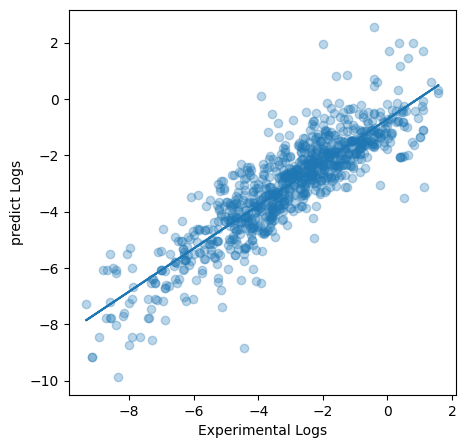

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred ,alpha=.3)
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
plt.plot( y_train , p(y_train))
plt.ylabel('predict Logs')
plt.xlabel('Experimental Logs')
plt.show()